In [1]:
import numpy as np
import scipy as sp
import suite2p as s2p
import TwoPUtils
import os
from matplotlib import pyplot as plt
from InVivoDA_analyses import utilities as ut
from InVivoDA_analyses import plotUtils as pt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from STX3KO_analyses.path_dicts.path_dict_firebird import path_dictionary as path_dict

/home/mari/anaconda3/envs/dope2p_stx/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/mari/anaconda3/envs/dope2p_stx/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Overlay ROIs from 2 different channels

In [55]:
mouse = "SparseKO_13" #"GCAMP12"
plot_ROIs = True
exp_day = 1
#basedir = os.path.join("/mnt/BigDisk", "2P_scratch", mouse)
basedir = os.path.join(path_dict['preprocessed_root'], mouse)
# basedir = os.path.join(path_dict['sbx_root'], mouse)

In [56]:
from STX3KO_analyses.ymaze_sess_deets import SparseKO_sessions
all_sess = SparseKO_sessions
from InVivoDA_analyses import utilities as ut
info = ut.get_sess_for_exp_day(all_sess,mouse,exp_day=exp_day)
print(info)

{0: {'date': '24_05_2025', 'scene': 'YMaze_LNovel', 'session': 4, 'scan': 27, 'novel_arm': 1, 'exp_day': 1}}


In [57]:
plane = 0

date = info[0]['date'] #"10_12_2020, GRABDA7"
scene = info[0]['scene'] #"NeuroMods_LocationA"
sess = info[0]['session'] #3 
scan = info[0]['scan'] #1

s2p_dir = os.path.join(basedir,date,scene,"%s_%03d_%03d" %(scene, sess, scan),"suite2p", "plane" + str(plane))
# s2p_dir = os.path.join(basedir,"%s_%03d_%03d" %(scene, sess, scan),"suite2p", "plane" + str(plane))

figdir = os.path.join(path_dict['fig_dir'], mouse)
os.makedirs(figdir,exist_ok=True)
pt.set_fig_params(fontsize=12)

In [58]:
ops = np.load(os.path.join(s2p_dir,"ops.npy"),allow_pickle=True).all()

if plot_ROIs:
    stats = np.load(os.path.join(s2p_dir,"stat.npy"),allow_pickle=True)
    iscell = np.load(os.path.join(s2p_dir,"iscell.npy"),allow_pickle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


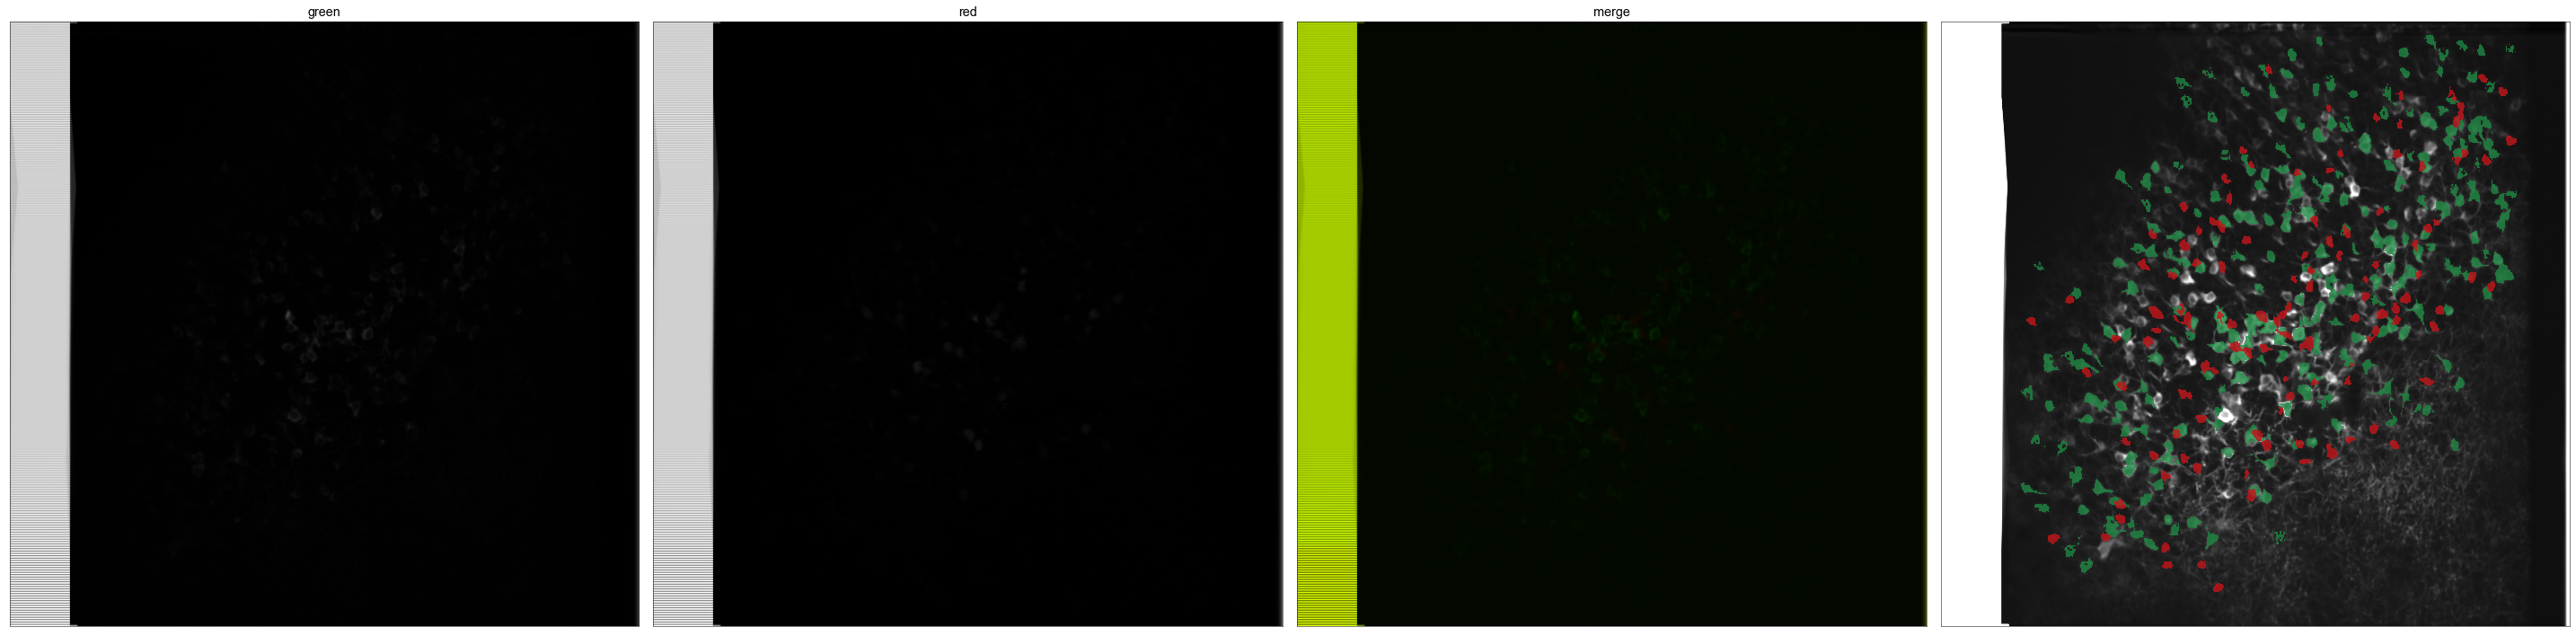

In [59]:
dual_color = True
plot_ROIs=True

aspect_ratio = 'original' # 'original' or '1'

if aspect_ratio == '1':
    aspect = ops['Lx']/(ops['Ly'])
else:
    aspect = 'auto'

f,ax = plt.subplots(1,4,figsize=[40,10])

img = np.zeros([*ops['meanImg'].shape,3])
# img[:,:,0]=ops['meanImg']/np.amax(ops['meanImg'].ravel())
img[:,:,1]=ops['meanImg']/(np.amax(ops['meanImg'].ravel())*.9)


ax[0].imshow(ops['meanImg']/(np.amax(ops['meanImg'].ravel())*.9),
             cmap="Greys_r",
             aspect=aspect
            )
ax[0].set_title("green")

if dual_color:
    ax[1].imshow(ops['meanImg_chan2']/(np.amax(ops['meanImg_chan2'].ravel())*.9),
                 cmap="Greys_r",
                aspect=aspect)
    ax[1].set_title("red")
    img[:,:,0]=ops['meanImg_chan2']/np.amax(ops['meanImg_chan2'].ravel())*.9

    ax[2].imshow(img,aspect=aspect) #, aspect=ops['Lx']/(ops['Ly']))
    ax[2].set_title("merge")
else:
    # ax[1].imshow(ops['meanImgE'],cmap="Greys_r")
    ax[1].imshow(ops['meanImg'],
                 cmap="Greys_r",
                 vmax=np.percentile(ops['meanImg'].ravel(),99),
                aspect=aspect)
                # aspect=ops['Lx']/ops['Ly'])

if plot_ROIs:
    masks = np.zeros(ops['meanImg'].shape)
    masks[:]=np.nan
    for i in range(stats.shape[0]):
        if iscell[i,0]>0:
            stat = stats[i]
            masks[stat['ypix'],stat['xpix']]=1 #np.float64(i)/np.float64(stats.size)
    ax[3].imshow(ops['meanImg'],
                 cmap="Greys_r",
                 vmax=np.percentile(ops['meanImg'].ravel(),89.5),
                aspect=aspect)
    ax[3].imshow(masks,alpha=0.8,vmin=0, vmax=1.3,
                 cmap='Greens',
                aspect=aspect) #RdYlGn_r') #'prism'
    
    # Now get the second set of ROIs
    s2p_dir_chan2 = os.path.join(basedir,date,scene,"%s_%03d_%03d" %(scene, sess, scan), 
                                    "chan2", "suite2p", "plane" + str(plane))
    # s2p_dir_chan2 = os.path.join(basedir,"%s_%03d_%03d" %(scene, sess, scan), 
    #                              "chan2", "suite2p", "plane" + str(plane))
    
    # ax[1].imshow(masks,alpha=.6,cmap='prism', aspect=ops['Lx']/ops['Ly']) #'prism'
    ops_2 = np.load(os.path.join(s2p_dir_chan2,"ops.npy"),allow_pickle=True).all()

    masks = np.zeros(ops['meanImg'].shape)
    masks[:]=np.nan
    stats_2 = np.load(os.path.join(s2p_dir_chan2,"stat.npy"),allow_pickle=True)
    iscell_2 = np.load(os.path.join(s2p_dir_chan2,"iscell.npy"),allow_pickle=True)
    for i in range(stats_2.shape[0]):
        if iscell_2[i,0]>0:
            stat = stats_2[i]
            masks[stat['ypix'],stat['xpix']]=1 #np.float64(i)/np.float64(stats_2.size)
    ax[3].imshow(masks,alpha=0.8,
                 cmap='Reds',vmin=0, vmax=1.3,
                aspect=aspect) #'RdYlGn') #'prism'
    

if not dual_color:
    ax[2].imshow(ops['meanImgE'],cmap="Greys_r")
    ax[2].imshow(masks,alpha=.8,cmap='gist_rainbow')


for i in range(4):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

f.patch.set_facecolor('white')

save_figures = False
if save_figures:
    pt.savefig(f,figdir,"%s_day%s_mean_FOV_overlay_bright" % (mouse, exp_day), extension='.png')
#f.savefig(os.path.join(figdir,("%s_day%d_mean_FOV_overlay.pdf" % (mouse, exp_day))),format='pdf')

In [60]:
np.sum(iscell[:,0]), np.sum(iscell_2[:,0])

(282.0, 122.0)